1.BUSINESS UNDERSTANDING

A recommendation system/algorithm uses machine learning and data filters to organize search 
results in a way that is most relevant to a particular user.

2.PROJECT GOALS

The purpose of this project is to come up with a recommendation system that is capable of accurately 
predicting how a user will rate a movie they have not yet viewed based on their historical preferences (past data).


3.DATA UNDERSTANDING AND EXPLORATORY DATA ANALYSIS

In [1963]:

# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1964]:
#Loading the datasets
ratings = pd.read_csv(r"C:\Users\kokum\OneDrive\Desktop\PHASE 4 PROJECT\ml-latest-small\ratings.csv")
movies = pd.read_csv(r"C:\Users\kokum\OneDrive\Desktop\PHASE 4 PROJECT\ml-latest-small\movies.csv")
links = pd.read_csv(r"C:\Users\kokum\OneDrive\Desktop\PHASE 4 PROJECT\ml-latest-small\links.csv")
tags = pd.read_csv(r"C:\Users\kokum\OneDrive\Desktop\PHASE 4 PROJECT\ml-latest-small\tags.csv")

In [1965]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Ratings has four columns UserId,MovieId,Rating and Timestamp . It also has a total of 100,835 rows. This indicates that there are  100,836 unique ratings for different user and movie combinations.


In [1966]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Movies has 3 columns MovieId, Title and genre and  9741 rows. THis shows that there are 9741 unique movies from 9742 genre.

In [1967]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


This is a table that shows each movie Id on two movie databases imdbId and tmdbId.

In [1968]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [1969]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


This table has 3 columns userId,MovieId,Tag and tomestamp. is has 3,683 unique tags placed on the 9,742 unique movies.

In [1970]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [1971]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


What is the distribution of the movie ratings?

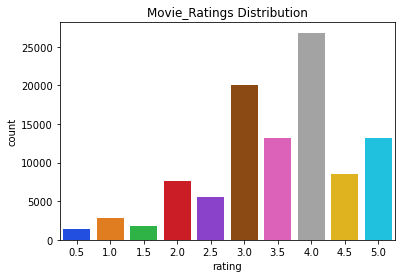

In [1972]:
sns.countplot(x="rating", data=ratings, palette= "bright")
plt.title("Movie_Ratings Distribution")
plt.show()

The movies are averagely rated with the highest rating being 4 and the lowest at 0.5

From the ratings.tail () ,there are 610 unique users.

In [1973]:
#Merge the movie and ratings table using the movie_Id column

merged = pd.merge(ratings,movies, on = "movieId")
merged.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [1974]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [1975]:
merged.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

The new data frame (merged) now has 5 columns and no null values.

What are the highest and lowest average rating movies?

In [1976]:
Average_rating = merged.groupby('movieId')[['rating']].mean()
highest_rated = Average_rating['rating'].idxmax()
movies[movies['movieId']==highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


In [1977]:
lowest_rated = Average_rating['rating'].idxmin()
movies[movies['movieId']==lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


Lamerica has the highest rating and Gypsy has the lowest

In [1978]:
#Looking at athe genres
#We are going to clean the genre column by removing any parethesis on the genere title(|) and also extract the year from the title and create a new year column
merged['genres'] = merged['genres'].apply(lambda x: x.split("|"))
merged.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"


In [1979]:
import re

In [1980]:
def extract_year_alternative(merged):  
    """  
    Extract the year from the title and create a new 'year' column.  
    Uses string splitting as an alternative.  
    """  
    merged['year'] = merged['title'].str.extract(r'\((\d{4})\)', expand=False)  
    merged['title'] = merged['title'].str.replace(r'\s*\((\d{4})\)', '', regex=True).str.strip()  
    merged['year'] = pd.to_numeric(merged['year'], errors='coerce')  # Convert to numeric, setting errors to NaN  
    return merged 

merged = extract_year_alternative(merged.copy())  

#print(movies)  
merged.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,5,1,4.0,847434962,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
2,7,1,4.5,1106635946,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
3,15,1,2.5,1510577970,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
4,17,1,4.5,1305696483,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0


How many Unique Genres are there?

In [1981]:
# The genres columncontaints strings that need to be split into individual genres before counting.
from collections import Counter

genre_count = Counter(g for genres in merged["genres"] for g in genres)

print(f"There are {len(genre_count)} genres.")

genre_count

There are 20 genres.


Counter({'Adventure': 24161,
         'Animation': 6988,
         'Children': 9208,
         'Comedy': 39053,
         'Fantasy': 11834,
         'Romance': 18124,
         'Action': 30635,
         'Crime': 16681,
         'Thriller': 26452,
         'Mystery': 7674,
         'Horror': 7291,
         'Drama': 41928,
         'War': 4859,
         'Western': 1930,
         'Sci-Fi': 17243,
         'Musical': 4138,
         'Film-Noir': 870,
         'IMAX': 4145,
         'Documentary': 1219,
         '(no genres listed)': 47})

In [1982]:
print("The 5 most common genres: \n" ,genre_count.most_common(5))

The 5 most common genres: 
 [('Drama', 41928), ('Comedy', 39053), ('Action', 30635), ('Thriller', 26452), ('Adventure', 24161)]


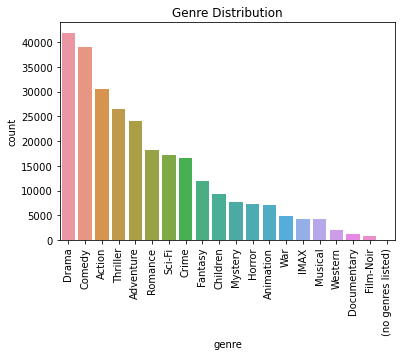

In [2006]:
#Visualizing the genere popularity
genre_count_df = pd.DataFrame([genre_count]).T.reset_index()
genre_count_df.columns = ["genre" , "count"]

sns.barplot(x='genre',y='count', data= genre_count_df.sort_values(by = 'count' ,ascending=False))
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.show()

The 5 most common genres are Drama,Comedy,Action, Thriller and Adventure.


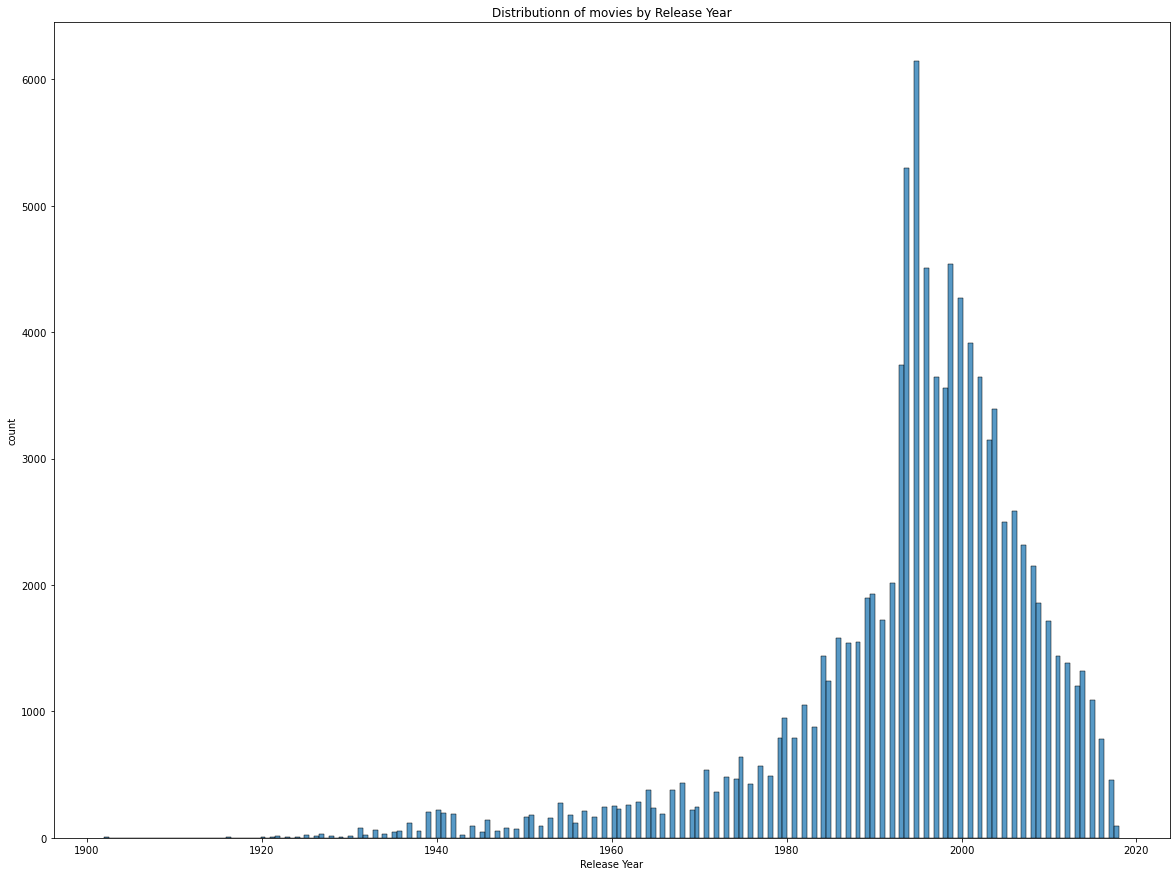

In [1984]:
fig,ax = plt.subplots()
fig.set_size_inches(20,15)
sns.histplot(merged['year'], ax=ax, palette = 'dark')
plt.xlabel('Release Year')
plt.ylabel('count')
plt.title('Distributionn of movies by Release Year')
plt.show()

Most of the ratings appear to be from movies made in between 1990 and 2010

4.MODELING

Modeling will be done using the surprise library where KNN will be the baseline model and SVD(Collaborative filtering) will be used to implement the recommendation system, allowing for the prediction of the user preferences based on past data.

In [1985]:
# Importing all the necessary libraries

from surprise import Reader,Dataset
from surprise.prediction_algorithms import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.model_selection import train_test_split as tts
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.dataset import DatasetAutoFolds


In [1986]:
# Picking the three columns to create a new variable(compressed)
compressed = merged[['userId','movieId','rating']]
compressed.reset_index(drop=True,inplace=True)
compressed

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
100831,610,160341,2.5
100832,610,160527,4.5
100833,610,160836,3.0
100834,610,163937,3.5


Splitting the data into training and testing sets.

In [1988]:
train,test = tts(compressed,test_size=0.2)

In [1989]:
print(train.columns)
print(train.head())

Index(['userId', 'movieId', 'rating'], dtype='object')
       userId  movieId  rating
15574     380     3489     4.0
24120     219     3996     4.0
91798     168     7333     4.5
45924     313     1909     2.0
36223     480     4995     4.0


In [1990]:
print(type(train)) 

<class 'pandas.core.frame.DataFrame'>


In [1991]:
train['userId'] = train['userId'].astype(str)
train['movieId'] = train['movieId'].astype(str)
train['rating'] = train['rating'].astype(float)

In [1992]:
#Loading the training and the testing datasets for the recommender system with ratings expected to be on a scale of 0.5-5
reader = Reader(rating_scale=(0.5,5))
data_train = Dataset.load_from_df(train, reader)
data_test = Dataset.load_from_df(test, reader)

In [1993]:
x_train = DatasetAutoFolds.build_full_trainset(data_train)

# Get the raw ratings from the trainset (userID, itemID, rating)
x_train1 = [(x_train.to_raw_uid(uid), x_train.to_raw_iid(iid), rating)
                     for (uid, iid, rating) in x_train.all_ratings()]

In [1994]:
x_test = DatasetAutoFolds.build_full_trainset(data_test)
x_test1 = list(test[['userId', 'movieId', 'rating']].to_records(index=False))

Fitting the KNN Basic Model

In [1995]:
#Initializing the cosine similarity function that will focus on the user brand relationship
sim_cos = {'name':'cosine','user_brand' :True}

In [1996]:
#Initializing the KNN Model with the similarity option of sim_cos and fitting the model.
model = KNNBasic(sim_options=sim_cos)
model.fit(x_train)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [1997]:
#Creating the predictions
model_test_preds = model.test(x_test1)
accuracy.rmse(model_test_preds)

RMSE: 1.0421


1.042103004440017

An RMSE of 1.0429 means that on average the KNN model predictions are off by about 1.0429 units from the actual ratings in the test set. This means that if the actual rating is 2.5 than the model can predict it as either 1.5 or 3.5.

In [1998]:
# Fitting the same dataset using the SVD Model
svd_model = SVD()
svd_model.fit(x_train)

In [1999]:
svd_test_preds = svd_model.test(x_test1)
accuracy.rmse(svd_test_preds)

RMSE: 1.0421


1.042103004440017

The SVD model has the same RMSE as the KNN model. This means that there has been no improvement to the predictions even after using SVD. 

We can therefore try and tune the model using gridsearch so as to identify the best parameters to use.

In [2000]:
#Define the grid parameter and initialize GridSerchCV with the SVD model and parameter grid

param_grid ={'n_factors':[20,50,100] , 'n_epochs':[10,20,],
             'lr_all': [0.002,0.005,0.007] ,'reg_all': [0.02,0.04,0.08]}
grid_model = GridSearchCV(SVD,param_grid = param_grid,n_jobs = -1,joblib_verbose = 5)
grid_model.fit(data_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  4.2min finished


In [2001]:
grid_model.best_params , grid_model.best_score

({'rmse': {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.08},
  'mae': {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.08}},
 {'rmse': 0.8721417755654622, 'mae': 0.6706977300875481})

In [2002]:
grid_svd = SVD(n_factors=100 ,n_epochs=20 ,lr_all= 0.007 , reg_all= 0.08)
grid_svd.fit(x_train)

The grid search returned an svd model that is much better than the default RMSE of 1.0429 and gives an RMSE of 0.872

In [2003]:
gridsvd_test_preds = grid_svd.test(x_test1)
accuracy.rmse(gridsvd_test_preds)

RMSE: 1.0421


1.042103004440017

In [2004]:
y_hats_df = pd.DataFrame(gridsvd_test_preds)
avg_rat_df = y_hats_df.groupby(['uid']).mean()[['r_ui','est']]

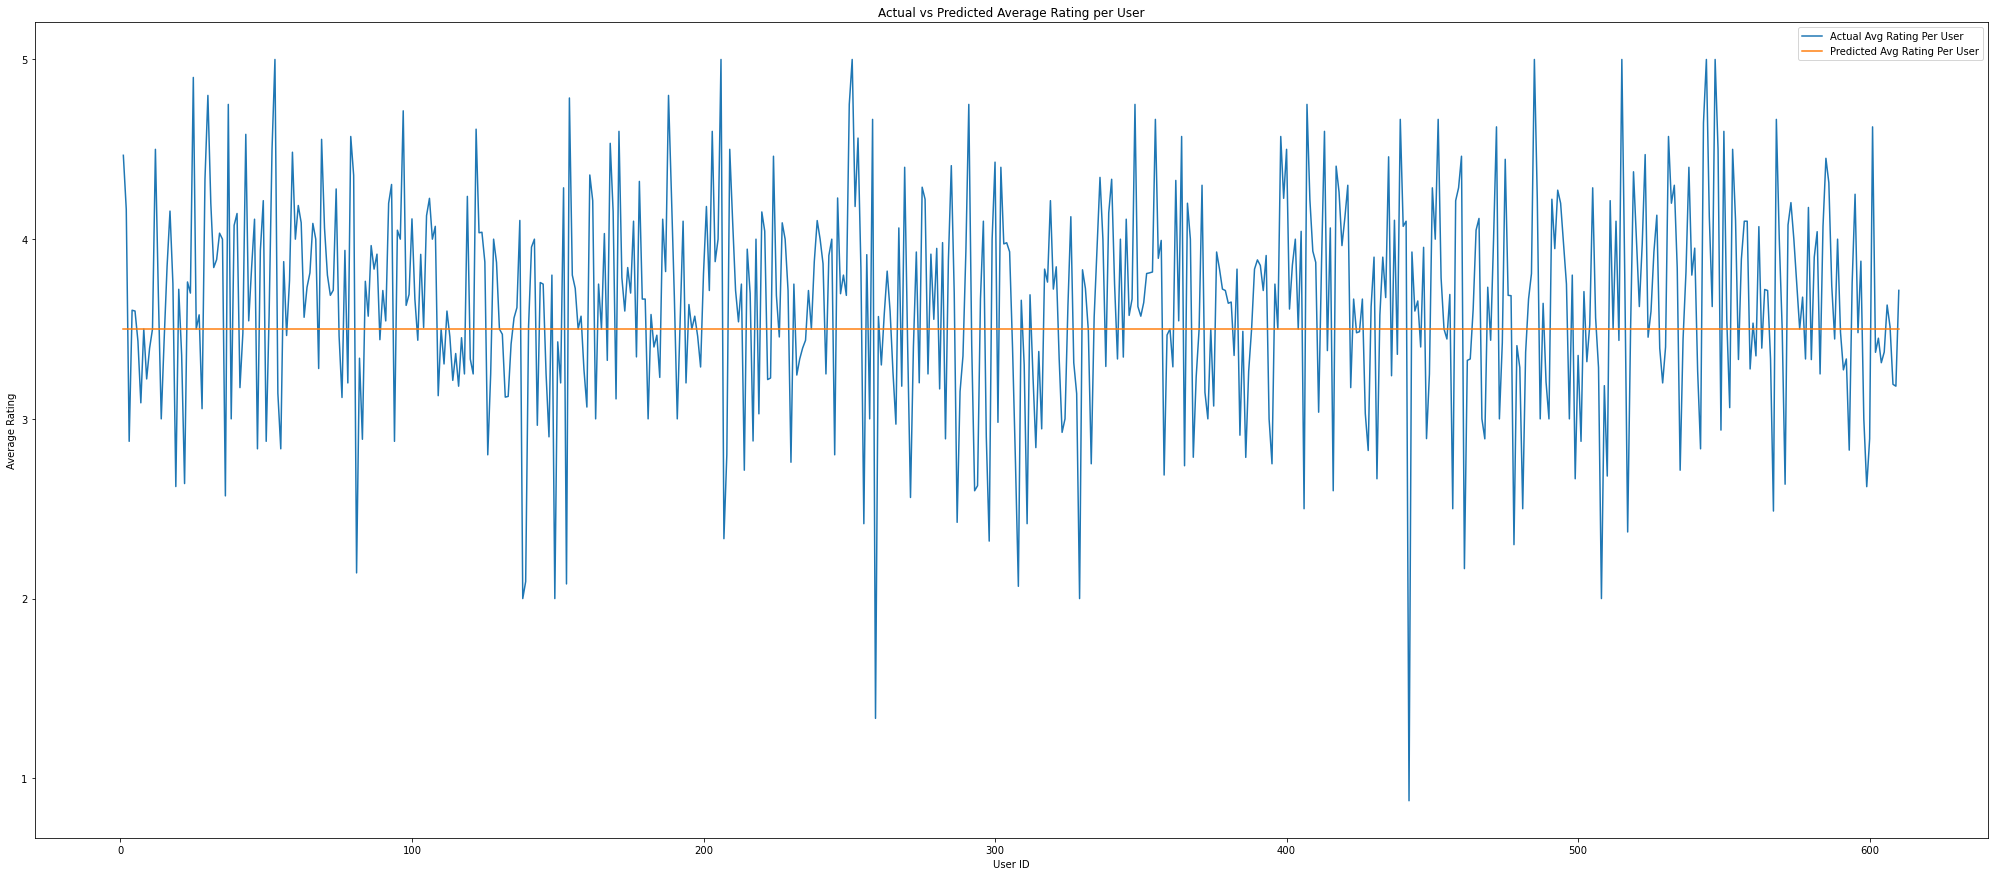

In [2005]:
fig, ax = plt.subplots(figsize=(35,15))
sns.lineplot(data=avg_rat_df, x=avg_rat_df.index, y=avg_rat_df['r_ui'], ax=ax, palette = 'palette')
sns.lineplot(data=avg_rat_df, x=avg_rat_df.index, y=avg_rat_df['est'], ax=ax, palette = 'dark')
plt.legend(labels=['Actual Avg Rating Per User', 'Predicted Avg Rating Per User'])
ax.set_xlabel("User ID")
ax.set_ylabel("Average Rating")
plt.title("Actual vs Predicted Average Rating per User")
plt.show()